In [8]:
from keras.preprocessing import image
import numpy as np
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers.core import Dense,Flatten
from sklearn.metrics import confusion_matrix
#from keras.applications.resnet import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from libtiff import TIFF
from keras.preprocessing import image

In [2]:
df=pd.read_csv('Merged_df.csv')

In [3]:
merged_df=df

In [4]:
merged_df

,Unnamed: 0,Unnamed: 0.1,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,Tiff Image Name,Numeric Label,Stable,Increased,Decreased,JPG Image Name
0,0,0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff,1,1,0,0,image_2016-01-03.jpg
1,1,1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff,2,0,1,0,image_2016-01-10.jpg
2,2,2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff,3,0,0,1,image_2016-01-31.jpg
3,3,3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff,1,1,0,0,image_2016-01-24.jpg
4,4,4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff,1,1,0,0,image_2016-01-17.jpg
5,5,5,2016/w06,266,5001,Medellín,-8,Decreased,8,Stable,Stable,image_2016-02-07.tiff,1,1,0,0,image_2016-02-21.jpg
6,6,6,2016/w07,234,5001,Medellín,-32,Decreased,32,Unstable,Decreased,image_2016-02-14.tiff,3,0,0,1,image_2016-02-28.jpg
7,7,7,2016/w08,258,5001,Medellín,24,Increased,24,Unstable,Increased,image_2016-02-21.tiff,2,0,1,0,image_2016-03-13.jpg
8,8,8,2016/w09,272,5001,Medellín,14,Increased,14,Stable,Stable,image_2016-02-28.tiff,1,1,0,0,image_2016-02-07.jpg
9,9,9,2016/w10,189,5001,Medellín,-83,Decreased,83,Unstable,Decreased,image_2016-03-06.tiff,3,0,0,1,image_2016-03-27.jpg


In [9]:
train_image = []
string='/srv/data/data0/DenguePrediction/Image_Binning_Label_and_ResNet50/All Images from 2008 to 2021/'
for i in tqdm(range(merged_df.shape[0])):
#for i in range(1,156):
    img = image.load_img(string+merged_df['JPG Image Name'][i],target_size=(1205,765,3))
    img = image.img_to_array(img)
    img = img/255
#     tif = TIFF.open(string+merged_df['TIFF Image Name'][i],target_size=(1205,765,3))
#     image= tif.read_image()
#     for image in tif.iter_images(): 
#         pass
#     img=image
    x=np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    #img=img.tolist()
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 156/156 [00:00<00:00, 161.62it/s]


In [11]:
X

array([[[[-123.24078 , -116.33978 , -103.49979 ],
         [-123.24078 , -116.33978 , -103.49979 ],
         [-123.23294 , -116.33194 , -103.49194 ],
         ...,
         [-123.511375, -116.610374, -103.77038 ],
         [-123.511375, -116.610374, -103.77038 ],
         [-123.507454, -116.60645 , -103.76646 ]],

        [[-123.166275, -116.265274, -103.42528 ],
         [-123.166275, -116.265274, -103.42528 ],
         [-123.16235 , -116.26135 , -103.42136 ],
         ...,
         [-123.511375, -116.610374, -103.77038 ],
         [-123.507454, -116.60645 , -103.76646 ],
         [-123.50353 , -116.60253 , -103.762535]],

        [[-123.142746, -116.241745, -103.40175 ],
         [-123.138824, -116.23782 , -103.39783 ],
         [-123.1349  , -116.2339  , -103.393906],
         ...,
         [-123.483925, -116.582924, -103.74293 ],
         [-123.48    , -116.579   , -103.739006],
         [-123.47608 , -116.57508 , -103.735085]],

        ...,

        [[-123.534904, -116.6339  , -1

In [6]:
new_merged_df=merged_df.copy()

In [7]:
y = np.array(new_merged_df.drop(['Unnamed: 0','Unnamed: 0.1','epiweek','Cases','Municipality code','Municipality','cases_differences','cases_intensity','cases_diff_abs','Stability Label','Tiff Image Name','final_cases_label','Numeric Label','JPG Image Name'],axis=1))
y.shape

(156, 3)

In [8]:
y
y = y.astype(np.float)
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0

In [9]:
X.shape

(156, 1205, 765, 3)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [11]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(1205,765,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [12]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))


In [13]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
#resnet_model.compile(tf.keras.optimizers.SGD(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=30)
# This callback will stop the training when there is no improvement in the loss for 10 consecutive epochs.
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/home/jupyter-apadoo/.local/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
# This callback will stop the training when there is no improvement in
# the loss for 30 consecutive epochs.
history=resnet_model.fit(X_train, y_train, epochs=2000, validation_data=(X_test, y_test), batch_size=64,callbacks=[callback])

Epoch 1/2000
2/2 [==============================] - 15s 8s/step - loss: 4.5235 - accuracy: 0.4495 - val_loss: 5.8814 - val_accuracy: 0.1702
Epoch 2/2000
2/2 [==============================] - 4s 3s/step - loss: 4.0676 - accuracy: 0.3945 - val_loss: 2.7827 - val_accuracy: 0.6809
Epoch 3/2000
2/2 [==============================] - 4s 3s/step - loss: 2.5597 - accuracy: 0.7431 - val_loss: 4.2671 - val_accuracy: 0.6809
Epoch 4/2000
2/2 [==============================] - 4s 3s/step - loss: 3.4953 - accuracy: 0.7431 - val_loss: 4.2215 - val_accuracy: 0.6809
Epoch 5/2000
2/2 [==============================] - 4s 3s/step - loss: 3.2575 - accuracy: 0.7431 - val_loss: 3.2306 - val_accuracy: 0.6809
Epoch 6/2000
2/2 [==============================] - 4s 3s/step - loss: 2.2733 - accuracy: 0.7431 - val_loss: 1.7103 - val_accuracy: 0.6809
Epoch 7/2000
2/2 [==============================] - 4s 3s/step - loss: 1.2976 - accuracy: 0.7431 - val_loss: 1.6558 - val_accuracy: 0.1489
Epoch 8/2000
2/2 [========

2/2 [==============================] - 4s 3s/step - loss: 0.7319 - accuracy: 0.7431 - val_loss: 0.9364 - val_accuracy: 0.6809
Epoch 118/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7451 - accuracy: 0.7431 - val_loss: 0.8658 - val_accuracy: 0.6809
Epoch 119/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7624 - accuracy: 0.7431 - val_loss: 0.8580 - val_accuracy: 0.6809
Epoch 120/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7109 - accuracy: 0.7431 - val_loss: 0.9552 - val_accuracy: 0.6809
Epoch 121/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7749 - accuracy: 0.7431 - val_loss: 0.9210 - val_accuracy: 0.6809
Epoch 122/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7360 - accuracy: 0.7431 - val_loss: 0.8672 - val_accuracy: 0.6809
Epoch 123/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7467 - accuracy: 0.7431 - val_loss: 0.8775 - val_accuracy: 0.6809
Epoch 124/2000
2/2 [========

2/2 [==============================] - 4s 3s/step - loss: 0.7020 - accuracy: 0.7431 - val_loss: 0.9284 - val_accuracy: 0.6809
Epoch 234/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7235 - accuracy: 0.7431 - val_loss: 0.8695 - val_accuracy: 0.6809
Epoch 235/2000
2/2 [==============================] - 4s 3s/step - loss: 0.6897 - accuracy: 0.7431 - val_loss: 0.8776 - val_accuracy: 0.6809
Epoch 236/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7120 - accuracy: 0.7431 - val_loss: 0.9026 - val_accuracy: 0.6809
Epoch 237/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7082 - accuracy: 0.7431 - val_loss: 0.8811 - val_accuracy: 0.6809
Epoch 238/2000
2/2 [==============================] - 4s 3s/step - loss: 0.7206 - accuracy: 0.7431 - val_loss: 0.8663 - val_accuracy: 0.6809
Epoch 239/2000
2/2 [==============================] - 4s 3s/step - loss: 0.6951 - accuracy: 0.7431 - val_loss: 0.9426 - val_accuracy: 0.6809
Epoch 240/2000
2/2 [========

In [28]:
history.history['accuracy']
history.history['val_accuracy']

[0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604,
 0.6808510422706604]

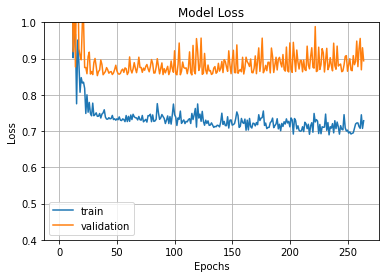

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [17]:
import cv2
image=cv2.imread('image_2016-07-10.jpg')
#image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image,axis=0)

In [18]:
pred=resnet_model.predict(image)

In [19]:
pred

array([[1.0000000e+00, 2.5395471e-19, 8.0569266e-16]], dtype=float32)

In [132]:
from sklearn.metrics import f1_score
y_pred=resnet_model.predict(X_test)
y_pred
#y_pred=y_pred[:,0]
#y_pred
#f1_score = f1_score(y_test,y_pred)
list_y_pred=[]
list1 = y_pred.tolist()
list1
#len(list1)
#from compiler.ast import flatten
#import flatten
#flatten(list1)
for i in range(len(list1)):
    #rint(list1[i])
    #rint(len(list1[i]))
    for j in range(len(list1[i])):
        list_y_pred.append(list1[i][j])
len(list_y_pred)
#list_y_pred=list_y_pred[:,0]
list_y_pred 
a=np.round(list_y_pred)
aa=a.tolist()
aa

[1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [133]:
y_test
list2 = y_test.tolist()
list2
list_y_test=[]
#len(list1)
#from compiler.ast import flatten
#import flatten
#flatten(list1)
for i in range(len(list2)):
    #rint(list1[i])
    #rint(len(list1[i]))
    for j in range(len(list2[i])):
        list_y_test.append(list2[i][j])
len(list_y_test)
b=np.round(list_y_test)
bb=b.tolist()
bb

[1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [142]:
f1score = f1_score(aa,bb)
acc=metrics.accuracy_score(aa,bb)
#acc
#f1_score
f1score
#acc

0.6808510638297872